In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #显示中文
plt.rcParams['axes.unicode_minus'] = False # 正常显示负号
import seaborn as sns

# 数据集wine reviews处理

## 1 数据可视化和摘要

## 数据摘要

In [82]:
# 导入数据
wine1 = pd.read_csv('./wine-reviews/winemag-data_first150k.csv')
wine2 = pd.read_csv('./wine-reviews/winemag-data-130k-v2.csv')
wine = pd.concat([wine1, wine2], ignore_index=True, sort=False)
wine=wine.drop(labels='Unnamed: 0', axis=1)
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280901 entries, 0 to 280900
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                280833 non-null  object 
 1   description            280901 non-null  object 
 2   designation            197701 non-null  object 
 3   points                 280901 non-null  int64  
 4   price                  258210 non-null  float64
 5   province               280833 non-null  object 
 6   region_1               234594 non-null  object 
 7   region_2               111464 non-null  object 
 8   variety                280900 non-null  object 
 9   winery                 280901 non-null  object 
 10  taster_name            103727 non-null  object 
 11  taster_twitter_handle  98758 non-null   object 
 12  title                  129971 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 27.9+ MB


In [83]:
# 数据去重
wine.duplicated().value_counts()
wine.drop_duplicates()
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280901 entries, 0 to 280900
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                280833 non-null  object 
 1   description            280901 non-null  object 
 2   designation            197701 non-null  object 
 3   points                 280901 non-null  int64  
 4   price                  258210 non-null  float64
 5   province               280833 non-null  object 
 6   region_1               234594 non-null  object 
 7   region_2               111464 non-null  object 
 8   variety                280900 non-null  object 
 9   winery                 280901 non-null  object 
 10  taster_name            103727 non-null  object 
 11  taster_twitter_handle  98758 non-null   object 
 12  title                  129971 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 27.9+ MB


In [84]:
wine.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery,taster_name,taster_twitter_handle,title
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,NaN,NaN,NaN
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,NaN,NaN,NaN
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,NaN,NaN,NaN
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,NaN,NaN,NaN
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude,NaN,NaN,NaN


#### 标称属性

In [85]:
# 标称属性有country(产出国)、province（产出省）、region_1(产出地区1)
# region_2(产出地区2)、variety（品种）、winery(酒厂)
wine['country'].value_counts()

US                        116901
France                     43191
Italy                      43018
Spain                      14913
Portugal                   11013
Chile                      10288
Argentina                   9431
Australia                   7286
Austria                     6402
New Zealand                 4739
Germany                     4617
South Africa                3659
Greece                      1350
Israel                      1135
Canada                       453
Hungary                      377
Romania                      259
Bulgaria                     218
Uruguay                      201
Slovenia                     181
Croatia                      162
Turkey                       142
Mexico                       133
Moldova                      130
Georgia                      129
England                       83
Brazil                        77
Lebanon                       72
Cyprus                        42
Morocco                       40
Macedonia 

In [86]:
wine['province'].value_counts()

California                       80755
Washington                       18389
Tuscany                          13178
Bordeaux                         12052
Oregon                            9962
                                 ...  
Urla-Thrace                          1
Santa Barbara County-Condrieu        1
Martinborough Terrace                1
Paardeberg                           1
Mavrodaphne de Cephalonie            1
Name: province, Length: 490, dtype: int64

In [87]:
wine['region_1'].value_counts()

Napa Valley                               10689
Columbia Valley (WA)                       9099
Russian River Valley                       6662
California                                 6091
Mendoza                                    5887
                                          ...  
Côtes du Frontonnais                          1
Grand Roussillon                              1
Monterey-San Luis Obispo-Santa Barbara        1
Cacc’e Mmitte di Lucera                       1
Vin de Pays de l'Atlantique                   1
Name: region_1, Length: 1332, dtype: int64

In [88]:
wine['region_2'].value_counts()

Central Coast              24122
Sonoma                     20286
Columbia Valley            17260
Napa                       15615
Willamette Valley           6604
California Other            6179
Finger Lakes                3287
Sierra Foothills            3122
Napa-Sonoma                 2814
Mendocino/Lake Counties     2389
Central Valley              2177
Southern Oregon             1579
Long Island                 1451
Oregon Other                1388
North Coast                 1216
Washington Other            1127
South Coast                  470
New York Other               378
Name: region_2, dtype: int64

In [89]:
wine['variety'].value_counts()

Pinot Noir                  27563
Chardonnay                  26235
Cabernet Sauvignon          22272
Red Blend                   19008
Bordeaux-style Red Blend    14262
                            ...  
Pinot Grigio-Chardonnay         1
Biancale                        1
Prunelard                       1
Pardina                         1
Ramisco                         1
Name: variety, Length: 756, dtype: int64

In [90]:
wine['winery'].value_counts()

Williams Selyem                  585
Testarossa                       492
DFJ Vinhos                       473
Chateau Ste. Michelle            419
Wines & Winemakers               391
                                ... 
Vivi                               1
Château des Cabans                 1
Clairault                          1
Château les Grands  Maréchaux      1
Eli Madyson                        1
Name: winery, Length: 19186, dtype: int64

#### 数值数据

In [91]:
# 数值属性 包含points和price
# min 25% 50% 75% max即为points属性和price属性对应的五数概括
wine.describe()

,points,price
count,280901.000000,258210.000000
mean,88.146934,34.177162
std,3.151528,38.611708
min,80.000000,4.000000
25%,86.000000,16.000000
50%,88.000000,25.000000
75%,90.000000,40.000000
max,100.000000,3300.000000


In [92]:
# 每一列缺失值的个数统计如下：
# 其中points的缺失值个数为0，price的缺失值个数为12831
wine.isnull().sum(axis=0)

country                      68
description                   0
designation               83200
points                        0
price                     22691
province                     68
region_1                  46307
region_2                 169437
variety                       1
winery                        0
taster_name              177174
taster_twitter_handle    182143
title                    150930
dtype: int64

## 数据可视化

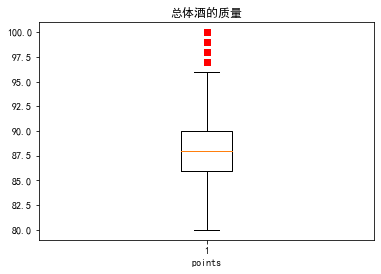

In [93]:
# 可视化检查数据分布及离群点
# 总体酒的质量，可以看到平均得分为88.24
plt.boxplot(wine['points'], notch=False, sym='rs', vert=True)
plt.xlabel('points')
plt.title('总体酒的质量')
plt.show()

In [94]:
# 对不同的国家查看其葡萄酒的质量,取前15个国家评价
temp = wine.country.value_counts()[:15]

In [95]:
temp

US              116901
France           43191
Italy            43018
Spain            14913
Portugal         11013
Chile            10288
Argentina         9431
Australia         7286
Austria           6402
New Zealand       4739
Germany           4617
South Africa      3659
Greece            1350
Israel            1135
Canada             453
Name: country, dtype: int64

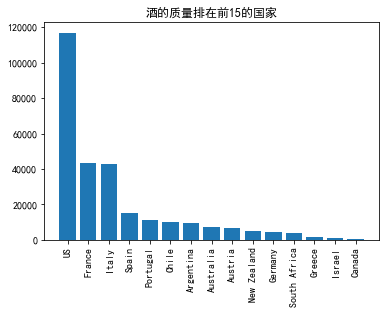

In [96]:
country_15 = temp.index
points = [temp[i] for i in range(15)]
plt.bar(country_15, points)
plt.xticks(rotation=90)
plt.title('酒的质量排在前15的国家')
plt.show()


In [98]:
wine.price.describe()

count    258210.000000
mean         34.177162
std          38.611708
min           4.000000
25%          16.000000
50%          25.000000
75%          40.000000
max        3300.000000
Name: price, dtype: float64

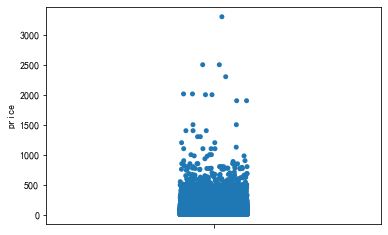

In [99]:
# 可以看到，价格最大为3300，最小为4,属于极值情况
sns.stripplot(y='price', data=wine)
plt.show()

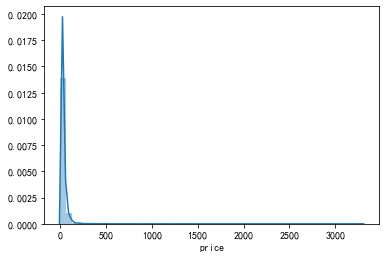

In [100]:
# 通过直方图和拟合参数分布得到葡萄酒价格的分布
# 可以看到大部分酒的价格在0-200之间
sns.distplot(wine.price.dropna())
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 <a list of 27 Text xticklabel objects>)

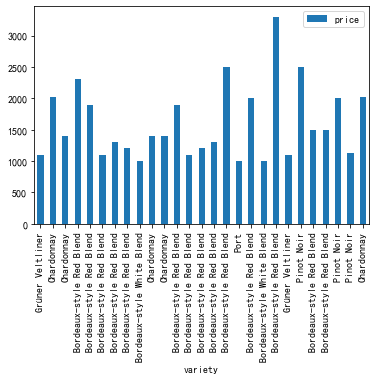

In [101]:
# 统计高价格酒
high_price = wine[wine.price>=1000][['country', 'province', 'designation', 'points', 'price', 'variety']]
high_price.plot(kind='bar', x='variety', y='price')
plt.xticks(rotation=90)

# 缺失数据处理

In [102]:
wine.isnull().sum(axis=0)

country                      68
description                   0
designation               83200
points                        0
price                     22691
province                     68
region_1                  46307
region_2                 169437
variety                       1
winery                        0
taster_name              177174
taster_twitter_handle    182143
title                    150930
dtype: int64

In [103]:
def show_nominal(series):
    data = series.value_counts()
    name = data.index[:15]
    counts = [data[name[i]] for i in range(15)]
    dict_ = {}
    for i in range(15):
        dict_[name[i]] = counts[i]
    frequence = [counts[i]/sum(counts) for i in range(15)]
    df = pd.DataFrame(counts, index=name, columns=['count'])
    df['freq'] = frequence
    print(df)
    plt.bar(name, counts)
    plt.xticks(rotation=90)
    plt.show()
    data[:15].plot(kind='pie',autopct='%.2f%%')
    plt.legend(bbox_to_anchor=(1,1))  #将图例设置在图片外
    plt.show()


               count      freq
US            116901  0.419909
France         43191  0.155142
Italy          43018  0.154521
Spain          14913  0.053568
Portugal       11013  0.039559
Chile          10288  0.036955
Argentina       9431  0.033876
Australia       7286  0.026171
Austria         6402  0.022996
New Zealand     4739  0.017023
Germany         4617  0.016584
South Africa    3659  0.013143
Greece          1350  0.004849
Israel          1135  0.004077
Canada           453  0.001627


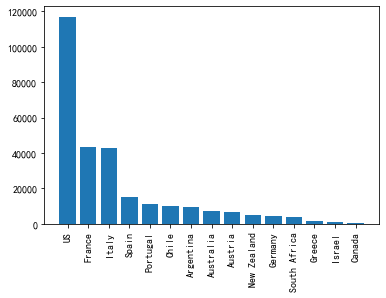

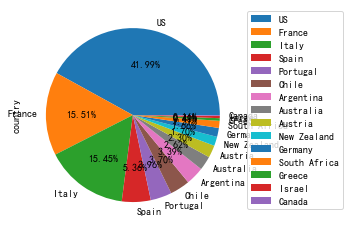

In [104]:
# 未处理缺失值的数据
show_nominal(wine['country'])

In [105]:
# 删除缺失值
wine_country = wine['country'].dropna()
wine_country.isnull().sum(axis=0)

0

               count      freq
US            116901  0.419909
France         43191  0.155142
Italy          43018  0.154521
Spain          14913  0.053568
Portugal       11013  0.039559
Chile          10288  0.036955
Argentina       9431  0.033876
Australia       7286  0.026171
Austria         6402  0.022996
New Zealand     4739  0.017023
Germany         4617  0.016584
South Africa    3659  0.013143
Greece          1350  0.004849
Israel          1135  0.004077
Canada           453  0.001627


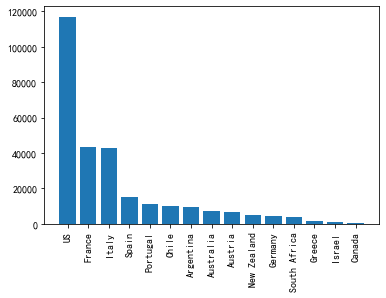

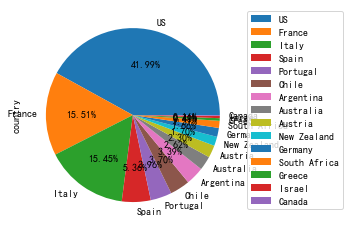

In [106]:
show_nominal(wine_country)

In [107]:
# 用最高频率值来填补缺失值
# print(wine_country.mode()[0])
wine_country = wine['country']
wine_country = wine_country.fillna(wine['country'].mode()[0])

In [108]:
wine_country.isnull().sum()

0

               count      freq
US            116969  0.420051
France         43191  0.155104
Italy          43018  0.154483
Spain          14913  0.053554
Portugal       11013  0.039549
Chile          10288  0.036946
Argentina       9431  0.033868
Australia       7286  0.026165
Austria         6402  0.022990
New Zealand     4739  0.017018
Germany         4617  0.016580
South Africa    3659  0.013140
Greece          1350  0.004848
Israel          1135  0.004076
Canada           453  0.001627


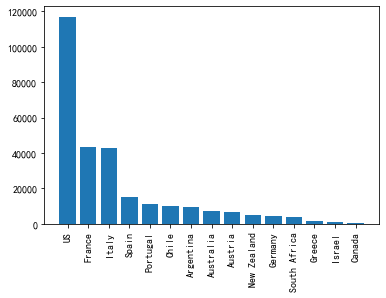

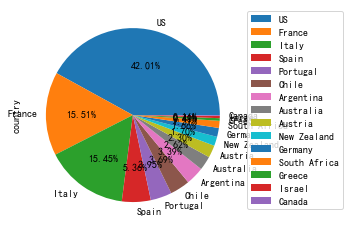

In [109]:
# 填充之后的数据。可以看到US的count数增加了
show_nominal(wine_country)

###  处理属性designation 的缺失值

In [110]:
wine.designation.isnull().sum()

83200

In [111]:
len(wine.designation )

280901

In [112]:
wine.designation.value_counts()

Reserve                     4761
Reserva                     3069
Estate                      2893
Barrel sample               1701
Riserva                     1452
                            ... 
Idube                          1
Brut Gold                      1
Avi                            1
Reserve Lachini Vineyard       1
Costacalda Passito             1
Name: designation, Length: 47239, dtype: int64

                 count      freq
Reserve           4761  0.220979
Reserva           3069  0.142446
Estate            2893  0.134277
Barrel sample     1701  0.078951
Riserva           1452  0.067394
Brut              1137  0.052773
Estate Grown      1070  0.049663
Barrel Sample      891  0.041355
Crianza            846  0.039267
Dry                787  0.036528
Estate Bottled     738  0.034254
Gran Reserva       591  0.027431
Old Vine           552  0.025621
Vieilles Vignes    533  0.024739
Brut Rosé          524  0.024321


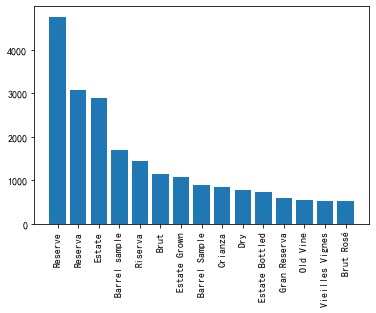

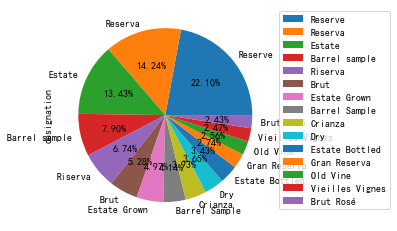

In [113]:
# 描述未处理之前的数据
show_nominal(wine.designation)

In [114]:
# 删除缺失值,删除之后总数减少
wine_designation = wine.designation.dropna()
wine_designation.isnull().sum(), len(wine_designation)

(0, 197701)

                 count      freq
Reserve           4761  0.220979
Reserva           3069  0.142446
Estate            2893  0.134277
Barrel sample     1701  0.078951
Riserva           1452  0.067394
Brut              1137  0.052773
Estate Grown      1070  0.049663
Barrel Sample      891  0.041355
Crianza            846  0.039267
Dry                787  0.036528
Estate Bottled     738  0.034254
Gran Reserva       591  0.027431
Old Vine           552  0.025621
Vieilles Vignes    533  0.024739
Brut Rosé          524  0.024321


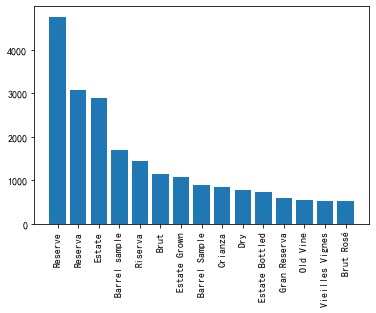

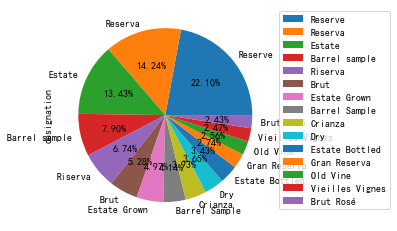

In [115]:
show_nominal(wine_designation)

In [116]:
# 用高频代替缺失值
wine_designation = wine.designation.fillna(wine_designation.mode()[0])
wine_designation.isnull().sum()

0

                 count      freq
Reserve          87961  0.839763
Reserva           3069  0.029300
Estate            2893  0.027619
Barrel sample     1701  0.016239
Riserva           1452  0.013862
Brut              1137  0.010855
Estate Grown      1070  0.010215
Barrel Sample      891  0.008506
Crianza            846  0.008077
Dry                787  0.007513
Estate Bottled     738  0.007046
Gran Reserva       591  0.005642
Old Vine           552  0.005270
Vieilles Vignes    533  0.005089
Brut Rosé          524  0.005003


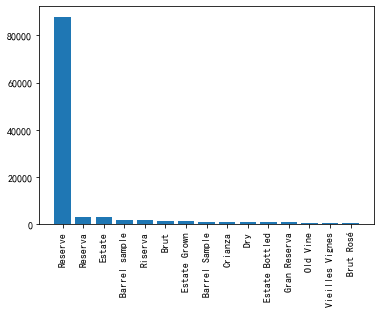

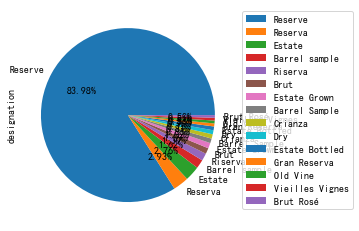

In [117]:
# 使用高频值代替缺失值之后可以看到Reserve所占的比例大幅提升
show_nominal(wine_designation)

### 处理数值数据的缺失值,以price(价格)为例进行分析

#### 处理price缺失值

In [118]:
def show_numerical(series, name):
    print(series.describe())
    print('-------------------')
    print(series.value_counts())
    sns.distplot(series)
    
    
    

In [119]:
wine['price'].isnull().sum()

22691

count    258210.000000
mean         34.177162
std          38.611708
min           4.000000
25%          16.000000
50%          25.000000
75%          40.000000
max        3300.000000
Name: price, dtype: float64
-------------------
20.0      14800
15.0      13122
25.0      11760
18.0      10871
30.0      10400
          ...  
388.0         1
496.0         1
367.0         1
820.0         1
3300.0        1
Name: price, Length: 415, dtype: int64


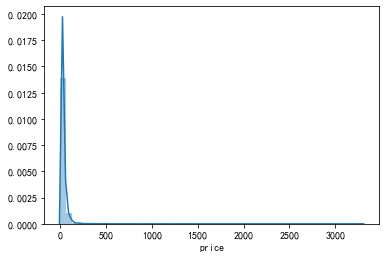

In [120]:
# 表示的是处理之前的数据分布
show_numerical(wine['price'], 'price')

In [121]:
# 对缺失值进行删除
wine_price = wine['price'].dropna()
wine_price.isnull().sum()

0

count    258210.000000
mean         34.177162
std          38.611708
min           4.000000
25%          16.000000
50%          25.000000
75%          40.000000
max        3300.000000
Name: price, dtype: float64
-------------------
20.0      14800
15.0      13122
25.0      11760
18.0      10871
30.0      10400
          ...  
3300.0        1
211.0         1
886.0         1
209.0         1
540.0         1
Name: price, Length: 415, dtype: int64


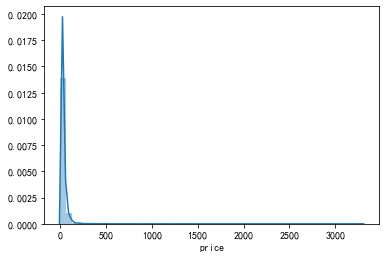

In [122]:
show_numerical(wine_price, 'wine_price')

In [123]:
# 用最高频率值填充缺失值
wine_price = wine['price'].fillna(wine['price'].mode()[0])
wine_price.isnull().sum()

0

count    280901.000000
mean         33.031940
std          37.220385
min           4.000000
25%          17.000000
50%          23.000000
75%          40.000000
max        3300.000000
Name: price, dtype: float64
-------------------
20.0      37491
15.0      13122
25.0      11760
18.0      10871
30.0      10400
          ...  
388.0         1
496.0         1
367.0         1
820.0         1
3300.0        1
Name: price, Length: 415, dtype: int64


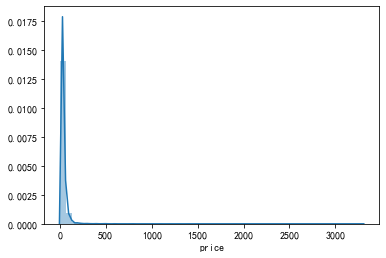

In [124]:
show_numerical(wine_price, 'price')

#### 处理了缺失值后发现其分布图基本一致，可以判断price的缺失值主要集中在高价位上，低价位几乎没有缺失值,因此对高价位进行分析

处理之后缺失值的数目位 0
10651     1100.0
13318     2013.0
26296     1400.0
34920     2300.0
34922     1900.0
34927     1100.0
34939     1300.0
34942     1200.0
35531     1000.0
51886     1400.0
83536     1400.0
152488    1900.0
152496    1100.0
152501    1200.0
152505    1300.0
166770    2500.0
187461    1000.0
216282    2000.0
220446    1000.0
231220    3300.0
240408    1100.0
249310    2500.0
262683    1500.0
262685    1500.0
264494    2000.0
264511    1125.0
271321    2013.0
Name: price, dtype: float64


(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

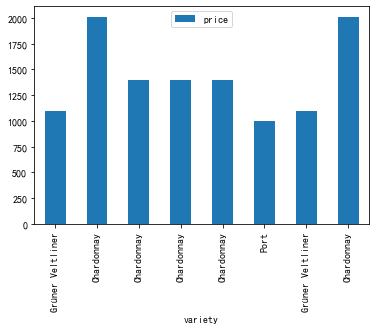

In [125]:
# 删除缺失值
wine_price = wine['price'].dropna()
print("处理之后缺失值的数目位", wine_price.isnull().sum())
high_price = wine_price[wine_price>=1000]
print(high_price)
high_price = wine[wine.price>=1000][['country', 'province', 'designation', 'points', 'price', 'variety']].dropna()
high_price.plot(kind='bar', x='variety', y='price')
plt.xticks(rotation=90)

In [126]:
# 用最高频填充缺失值
wine_price = wine['price'].fillna(wine['price'].mode()[0])
print("处理之后填充之的个数：", wine_price.isnull().sum())

处理之后填充之的个数： 0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 <a list of 27 Text xticklabel objects>)

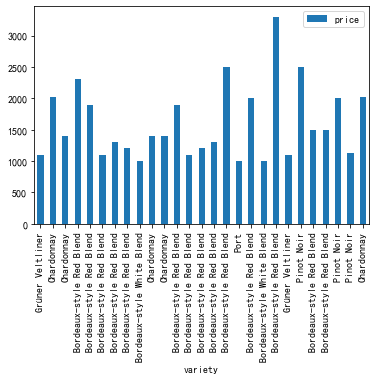

In [127]:
high_price = wine[wine.price>=1000][['country', 'province', 'designation', 'points', 'price', 'variety']]
high_price.price = wine['price'].fillna(wine['price'].mode()[0])
high_price.plot(kind='bar', x='variety', y='price')
plt.xticks(rotation=90)

# 数据集crime records处理

## 1 数据摘要与可视化

###  数据摘要

In [131]:
crime = pd.DataFrame()
# 整合所有的数据
for i in range(2011, 2017):
    path = './oakland-crime-statistics-2011-to-2016/records-for-' + str(i) + '.csv'
    crime_i = pd.read_csv(path)
    crime = pd.concat([crime_i, crime])
crime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1046388 entries, 0 to 180015
Data columns (total 13 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Agency                     1046384 non-null  object 
 1   Create Time                1046384 non-null  object 
 2   Location                   483425 non-null   object 
 3   Area Id                    864023 non-null   object 
 4   Beat                       1040583 non-null  object 
 5   Priority                   1046384 non-null  float64
 6   Incident Type Id           1046384 non-null  object 
 7   Incident Type Description  1045996 non-null  object 
 8   Event Number               1046384 non-null  object 
 9   Closed Time                1046359 non-null  object 
 10  Location 1                 374799 non-null   object 
 11  Zip Codes                  352 non-null      float64
 12  Location                   188052 non-null   object 
dtypes: float64(2)

In [132]:
crime.head()

,Agency,Create Time,Location,Area Id,Beat,Priority,Incident Type Id,Incident Type Description,Event Number,Closed Time,Location 1,Zip Codes,Location
0,OP,2016-01-01T00:00:57.000,ST&MARKET ST,P1,05X,2.0,415GS,415 GUNSHOTS,LOP160101000003,2016-01-01T00:32:30.000,NaN,NaN,NaN
1,OP,2016-01-01T00:01:25.000,AV&HAMILTON ST,P3,26Y,2.0,415GS,415 GUNSHOTS,LOP160101000005,2016-01-01T00:48:23.000,NaN,NaN,NaN
2,OP,2016-01-01T00:01:43.000,ST&CHESTNUT ST,P1,02X,2.0,415GS,415 GUNSHOTS,LOP160101000008,2016-01-01T00:21:24.000,NaN,NaN,NaN
3,OP,2016-01-01T00:01:48.000,WALLACE ST,P2,18Y,2.0,415GS,415 GUNSHOTS,LOP160101000007,2016-01-01T01:15:03.000,NaN,NaN,NaN
4,OP,2016-01-01T00:02:05.000,90TH AV,P3,34X,2.0,415GS,415 GUNSHOTS,LOP160101000009,2016-01-01T00:54:52.000,NaN,NaN,NaN


### 标称属性数据

In [133]:
# 标称属性包括Location  Area Id Incident Type Id ,无数值属性
crime['Location'].value_counts()

 INTERNATIONAL BLVD           5851
 AV&INTERNATIONAL BLVD        4935
 MACARTHUR BLVD               4918
 BROADWAY                     3879
 INTERNATIONAL BLVD           3866
                              ... 
 CIRCLE DR                       1
61ST 40TH AV                     1
53RD 16TH ST&28TH AV             1
11TH AV&OLIVE ST                 1
E GRAND AV&NORTHGATE AV          1
Name: Location, Length: 83872, dtype: int64

In [135]:
crime['Area Id'].value_counts()

1.0    290452
2.0    236700
P3     129054
P1     114560
P2      53033
3.0     32907
POU      5960
PCW       789
5.0       320
4.0       236
TEC        10
WAG         1
JLS         1
Name: Area Id, dtype: int64

In [136]:
crime['Incident Type Id'].value_counts()

933R     98497
SECCK    70965
415      66720
911H     54935
10851    47958
         ...  
407          1
626_1        1
PGE          1
963          1
148_1        1
Name: Incident Type Id, Length: 288, dtype: int64

In [137]:
crime['Priority'].value_counts()

2.0    814818
1.0    231542
0.0        24
Name: Priority, dtype: int64

In [138]:
crime.describe()

,Priority,Zip Codes
count,1.046384e+06,352.000000
mean,1.778676e+00,14049.377841
std,4.151937e-01,9658.498546
min,0.000000e+00,55.000000
25%,2.000000e+00,4560.000000
50%,2.000000e+00,13704.000000
75%,2.000000e+00,22280.000000
max,2.000000e+00,33120.000000


In [139]:
crime['Zip Codes'].value_counts()

4560.0     8
1481.0     5
14519.0    5
4380.0     4
27099.0    3
          ..
22477.0    1
5572.0     1
22281.0    1
22247.0    1
2050.0     1
Name: Zip Codes, Length: 287, dtype: int64

## 数据可视化

In [140]:
location = crime['Location'].value_counts()[:30]
location

 INTERNATIONAL BLVD              5851
 AV&INTERNATIONAL BLVD           4935
 MACARTHUR BLVD                  4918
 BROADWAY                        3879
 INTERNATIONAL BLVD              3866
 MACARTHUR BLVD                  3129
 AV&INTERNATIONAL BLVD           3067
 FOOTHILL BLVD                   2805
 7TH ST                          2792
 TELEGRAPH AV                    2382
 BROADWAY                        2132
 AV&MACARTHUR BLVD               2073
 FRUITVALE AV                    2063
 SAN PABLO AV                    1960
 ST&BROADWAY                     1955
 BANCROFT AV                     1917
 ST&TELEGRAPH AV                 1881
 FOOTHILL BLVD                   1791
 HIGH ST                         1732
 HEGENBERGER RD                  1629
 TELEGRAPH AV                    1584
 73RD AV                         1529
 ST&MARTIN LUTHER KING JR WY     1372
 AV&FOOTHILL BLVD                1334
 AV&BANCROFT AV                  1325
 BANCROFT AV                     1319
 ST&MARKET S

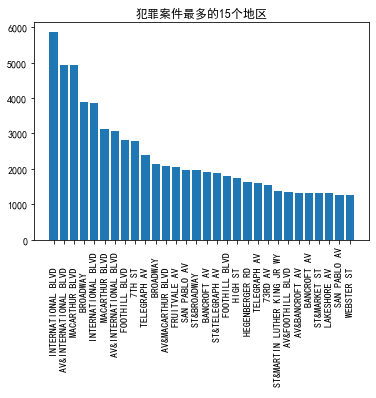

In [141]:
location_15 = location.index
freq = [location[i] for i in range(30)]
plt.bar(location_15, freq)
plt.xticks(rotation=90)
plt.title('犯罪案件最多的15个地区')
plt.show()

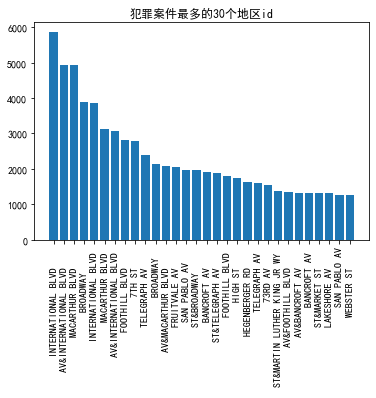

In [142]:
id = crime['Area Id'].value_counts()[:30]
id_30 = location.index
freq = [location[i] for i in range(30)]
plt.bar(id_30, freq)
plt.xticks(rotation=90)
plt.title('犯罪案件最多的30个地区id')
plt.show()

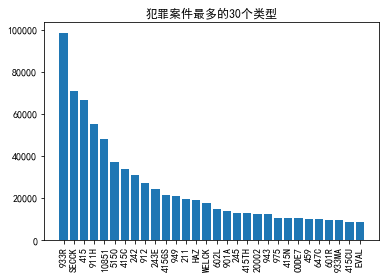

In [143]:
type_crime = crime['Incident Type Id'].value_counts()[:30]
id_30 = type_crime.index
freq = [type_crime[i] for i in range(30)]
plt.bar(id_30, freq)
plt.xticks(rotation=90)
plt.title('犯罪案件最多的30个类型')
plt.show()

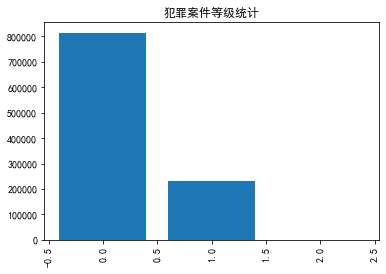

In [144]:
priority = crime['Priority'].value_counts()
priority_ = priority.index
freq = [priority[i] for i in range(3)]
plt.bar(priority_, freq)
plt.xticks(rotation=90)
plt.title('犯罪案件等级统计')
plt.show()

## 缺失数据的处理

In [145]:
crime.isnull().sum(axis=0)

Agency                             4
Create Time                        4
Location                      562963
Area Id                       182365
Beat                            5805
Priority                           4
Incident Type Id                   4
Incident Type Description        392
Event Number                       4
Closed Time                       29
Location 1                    671589
Zip Codes                    1046036
Location                      858336
dtype: int64

In [146]:
# 以location为例处理缺失数据
# 删除缺失数据
crime_location = crime['Location'].dropna().value_counts()[:30]
print(crime_location)
crime_location.isnull().sum(axis=0)

 INTERNATIONAL BLVD              5851
 AV&INTERNATIONAL BLVD           4935
 MACARTHUR BLVD                  4918
 BROADWAY                        3879
 INTERNATIONAL BLVD              3866
 MACARTHUR BLVD                  3129
 AV&INTERNATIONAL BLVD           3067
 FOOTHILL BLVD                   2805
 7TH ST                          2792
 TELEGRAPH AV                    2382
 BROADWAY                        2132
 AV&MACARTHUR BLVD               2073
 FRUITVALE AV                    2063
 SAN PABLO AV                    1960
 ST&BROADWAY                     1955
 BANCROFT AV                     1917
 ST&TELEGRAPH AV                 1881
 FOOTHILL BLVD                   1791
 HIGH ST                         1732
 HEGENBERGER RD                  1629
 TELEGRAPH AV                    1584
 73RD AV                         1529
 ST&MARTIN LUTHER KING JR WY     1372
 AV&FOOTHILL BLVD                1334
 AV&BANCROFT AV                  1325
 BANCROFT AV                     1319
 ST&MARKET S

0

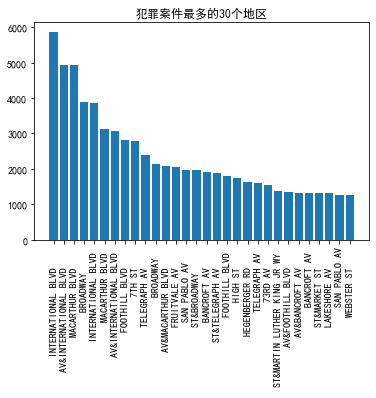

In [147]:
location_30 = crime_location.index
freq = [crime_location[i] for i in range(30)]
plt.bar(location_30, freq)
plt.xticks(rotation=90)
plt.title('犯罪案件最多的30个地区')
plt.show()

In [76]:
crime_location = crime['Location']
crime_location = crime_location.fillna(crime['Location'].mode()[0])
crime_location.isnull().sum(axis=0)

0

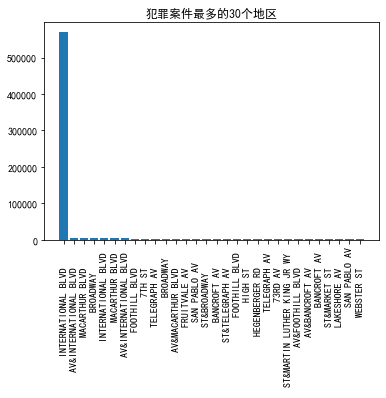

In [80]:
location_30 = crime_location.value_counts()[:30].index
freq = [crime_location.value_counts()[i] for i in range(30)]
plt.bar(location_30, freq)
plt.xticks(rotation=90)
plt.title('犯罪案件最多的30个地区')
plt.show()